In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, 
VotingRegressor, StackingRegressor, ExtraTreesRegressor, IsolationForest, 
RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, 
BaggingClassifier, VotingClassifier, StackingClassifier, ExtraTreesClassifier)

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# from xgboost import XGBRegressor, XGBClassifier
from sklearn.svm import SVR, SVC
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, precision_score,recall_score, classification_report, confusion_matrix


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [20]:
family_income_data = pd.read_csv('../dataset/family_income_data_cleaned_data.csv')

In [22]:
expenditures = [column for column in family_income_data.columns if 'Expenditure' in column]

In [23]:
expenditures = [column for column in family_income_data.columns if 'Expenditure' in column]
X = family_income_data.loc[:,expenditures]
y = family_income_data['Total Household Income']

In [6]:
## I gone use once only expentiture to predict the total household income
# then all feature to predict the total household income

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
random_forest_regressor = RandomForestRegressor(verbose=True,n_jobs=-1,n_estimators=1000)
random_forest_regressor.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.8min finished


RandomForestRegressor(n_estimators=1000, n_jobs=-1, verbose=True)

In [11]:
random_forest_regressor.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.2s finished


0.7695334308109284

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.4s finished


[Text(0.5, 0, 'Total Household Income'), Text(0, 0.5, 'Predicted TIH')]

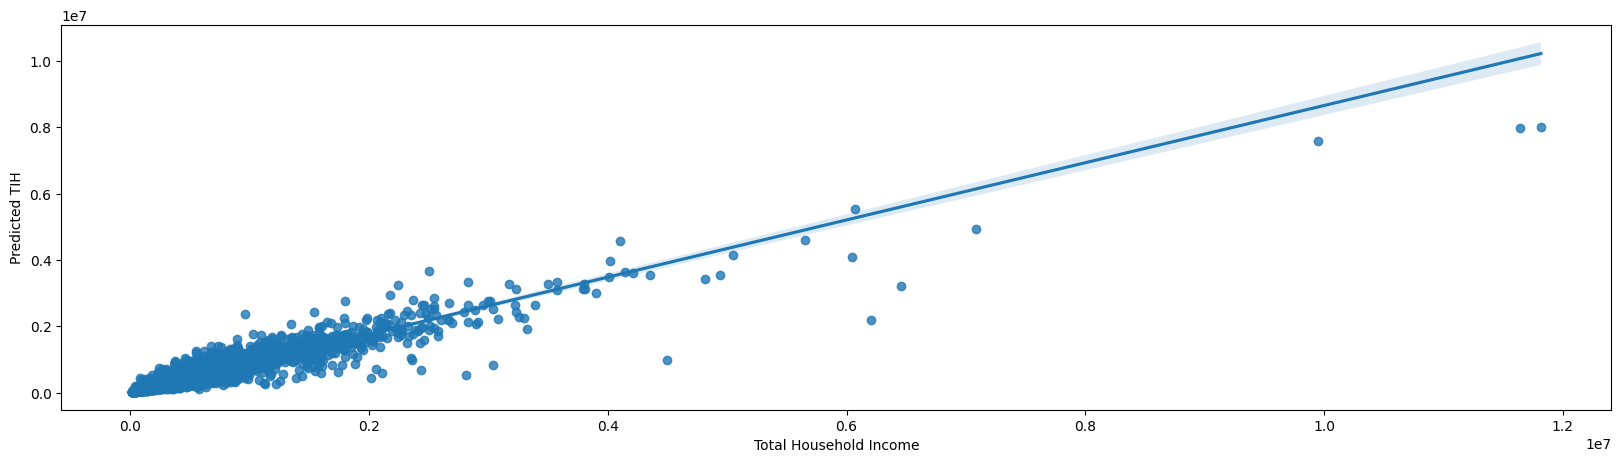

In [12]:
y_rfr_predict = random_forest_regressor.predict(X)
mean_squared_error(y, y_rfr_predict)
plt.figure(figsize=(20,5))
ax = sns.regplot(x=y, y = y_rfr_predict)
ax.set(xlabel='Total Household Income', ylabel='Predicted TIH')

In [13]:
xgbr = XGBRegressor(nthread = -1, eta=0.1, subsample=0.5)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, nthread=-1, ...)

In [14]:
xgbr.score(X_test, y_test)

0.7248036733008895

<Figure size 2000x500 with 0 Axes>

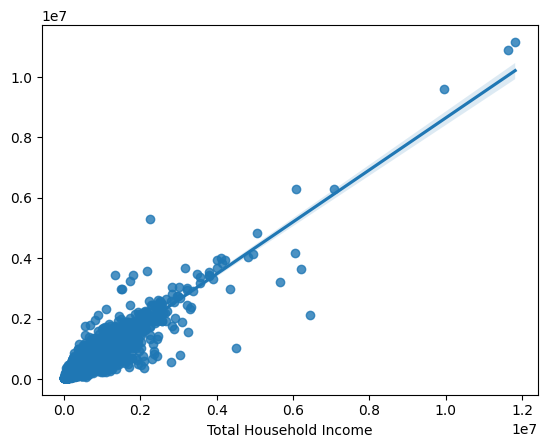

<Figure size 2000x500 with 0 Axes>

In [15]:
y_xgbr_predict = xgbr.predict(X)
mean_squared_error(y, y_xgbr_predict)
sns.regplot(x=y, y = y_xgbr_predict)
plt.figure(figsize=(20,5))

In [24]:
family_income_data.head()

,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,...,"Main Source of Water Supply_Shared, faucet, community water system","Main Source of Water Supply_Shared, tubed/piped deep well",Main Source of Water Supply_Tubed/piped shallow well,"Main Source of Water Supply_Unprotected spring, river, stream, etc",Household Head Highest Grade Completed (Simplified)_,Household Head Highest Grade Completed (Simplified)_Attended College,Household Head Highest Grade Completed (Simplified)_DNA/Primary/Elementary,Household Head Highest Grade Completed (Simplified)_Degrees/Programs,Household Head Highest Grade Completed (Simplified)_Post Baccalaureate,Household Head Highest Grade Completed (Simplified)_Secondary
0,480332,117848,42140,38300,24676,16806,3325,13460,3000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,198235,67766,17329,13008,17434,11073,2035,7833,2360,960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,82785,61609,34182,32001,7783,2590,1730,3795,4545,270,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,107589,78189,34030,28659,10914,10812,690,7887,6280,480,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,189322,94625,34820,30167,18391,11309,1395,11260,6400,1040,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
class_fid_cat = []
for col in family_income_data.columns:
    if family_income_data[col].dtype == 'object':
        class_fid_cat.append(col)
        print(col," : ",len(family_income_data[col].unique()))

Main Source of Income  :  3
Household Head Sex  :  2
Household Head Marital Status  :  6
Household Head Highest Grade Completed  :  46
Household Head Job or Business Indicator  :  2
Household Head Class of Worker  :  8
Type of Household  :  3
Type of Building/House  :  6
Type of Roof  :  7
Type of Walls  :  6
Tenure Status  :  8
Toilet Facilities  :  8
Main Source of Water Supply  :  11
Household Head Highest Grade Completed (Simplified)  :  6


In [25]:
family_income_data = family_income_data.drop(columns='Household Head Occupation')

In [26]:
educ_attainment = { 'DNA/Primary/Elementary' : ['Elementary Graduate', 'Grade 4', 'Grade 5', 'Grade 3', 'Grade 2', 'Grade 1', 'Grade 6', 'No Grade Completed', 'Preschool'], 
                    'Secondary' : ['High School Graduate', 'Second Year High School', 'Third Year High School', 'First Year High School'],
                    'Attended College' : ['Second Year College', 'Third Year College', 'First Year College', 'Second Year Post Secondary', 'Fourth Year College', 'First Year Post Secondary'],
                    'Post Baccalaureate' : ['Post Baccalaureate'], 
                    'Degrees/Programs' : ['Business and Administration Programs', 'Teacher Training and Education Sciences Programs', 'Engineering and Engineering Trades Programs', 'Engineering and Engineering trades Programs', 'Engineering and Engineering trades Programs', 'Health Programs', 'Computing/Information Technology Programs', 'Security Services Programs', 'Agriculture, Forestry, and Fishery Programs',
                                  'Transport Services Programs', 'Social and Behavioral Science Programs', 'Social and Behavioral Science Programs', 'Personal Services Programs', 'Humanities Programs', 'Other Programs in Education at the Third Level, First Stage, of the Type that Leads to an Award not Equivalent to a First University or Baccalaureate Degree',
                                  'Law Programs', 'Architecture and Building Programs', 'Basic Programs', 'Journalism and Information Programs', 'Arts Programs', 'Life Sciences Programs', 'Manufacturing and Processing Programs',
                                  'Social Services Programs', 'Physical Sciences Programs', 'Other Programs of Education at the Third Level, First Stage, of the Type that Leads to a Baccalaureate or First University/Professional Degree (HIgher Education Level, First Stage, or Collegiate Education Level)',
                                  'Veterinary Programs', 'Environmental Protection Programs'
                                 ]
                    }

In [27]:
family_income_data['Household Head Highest Grade Completed (Simplified)'] = family_income_data['Household Head Highest Grade Completed'].apply(lambda x : ''.join([key for key in educ_attainment.keys() if x in educ_attainment[key]]))

In [29]:
family_income_data['Household Head Highest Grade Completed'].value_counts()

Household Head Highest Grade Completed
High School Graduate                                                                                                                                                                                                   9628
Elementary Graduate                                                                                                                                                                                                    7640
Grade 4                                                                                                                                                                                                                2282
Grade 5                                                                                                                                                                                                                2123
Second Year High School                                                          

In [28]:
family_income_data['Household Head Highest Grade Completed (Simplified)'].value_counts()

Household Head Highest Grade Completed (Simplified)
DNA/Primary/Elementary    17704
Secondary                 14524
Degrees/Programs           5505
Attended College           3553
Post Baccalaureate          247
                             11
Name: count, dtype: int64

In [30]:
family_income_data['Total Household Income'].describe()

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: Total Household Income, dtype: float64

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
import missingno as msno

<Axes: >

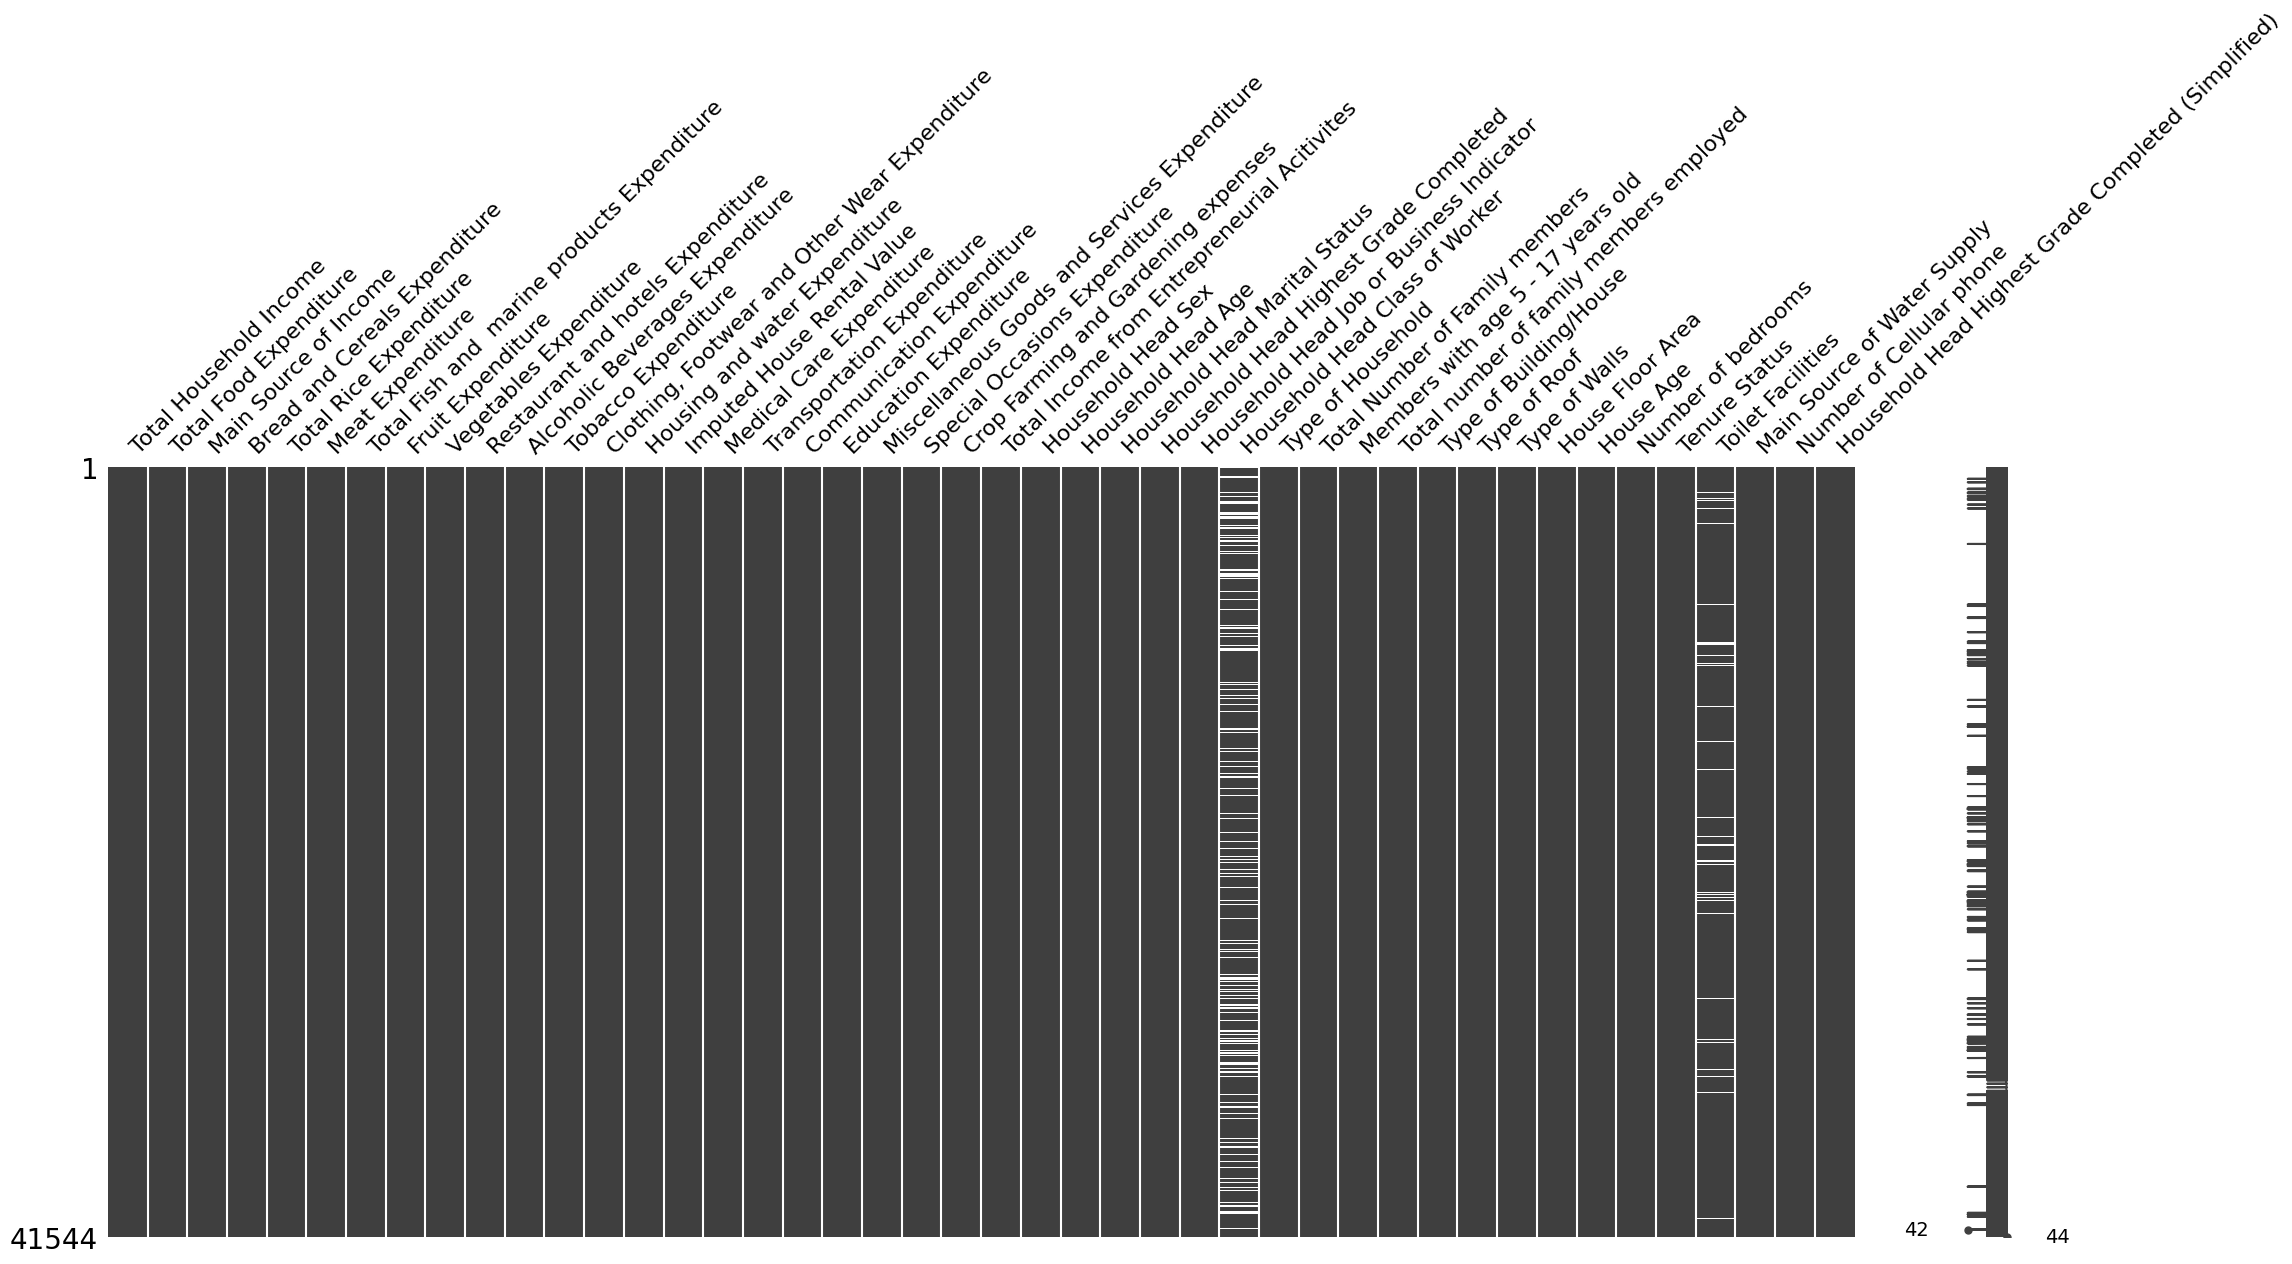

In [33]:
msno.matrix(family_income_data)

In [40]:
family_income_data['Household Head Class of Worker'].value_counts()

Household Head Class of Worker
Self-employed wihout any employee                             13766
Worked for private establishment                              13731
N/A                                                            7536
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: count, dtype: int64

In [39]:
family_income_data['Household Head Class of Worker'].fillna('N/A', inplace=True)

In [48]:
class_fid_cat

['Main Source of Income',
 'Household Head Sex',
 'Household Head Marital Status',
 'Household Head Highest Grade Completed',
 'Household Head Job or Business Indicator',
 'Household Head Class of Worker',
 'Type of Household',
 'Type of Building/House',
 'Type of Roof',
 'Type of Walls',
 'Tenure Status',
 'Toilet Facilities',
 'Main Source of Water Supply',
 'Household Head Highest Grade Completed (Simplified)']

In [51]:
class_fid_cat.remove('Household Head Highest Grade Completed')

In [52]:
class_fid_cat

['Main Source of Income',
 'Household Head Sex',
 'Household Head Marital Status',
 'Household Head Job or Business Indicator',
 'Household Head Class of Worker',
 'Type of Household',
 'Type of Building/House',
 'Type of Roof',
 'Type of Walls',
 'Tenure Status',
 'Toilet Facilities',
 'Main Source of Water Supply',
 'Household Head Highest Grade Completed (Simplified)']

In [59]:
ohe = OneHotEncoder()
cat_x = ohe.fit_transform(family_income_data[class_fid_cat])

In [65]:
!pip install --upgrade scikit-learn

In [78]:
columns_name = [f"{feature}_{cat}" for feature, categories in zip(family_income_data.columns, ohe.categories_) for cat in categories]
# ohe_df = pd.DataFrame(ohe_result.toarray(), columns=columns_name)
columns_name

['Total Household Income_Enterpreneurial Activities',
 'Total Household Income_Other sources of Income',
 'Total Household Income_Wage/Salaries',
 'Total Food Expenditure_Female',
 'Total Food Expenditure_Male',
 'Main Source of Income_Annulled',
 'Main Source of Income_Divorced/Separated',
 'Main Source of Income_Married',
 'Main Source of Income_Single',
 'Main Source of Income_Unknown',
 'Main Source of Income_Widowed',
 'Bread and Cereals Expenditure_No Job/Business',
 'Bread and Cereals Expenditure_With Job/Business',
 'Total Rice Expenditure_Employer in own family-operated farm or business',
 'Total Rice Expenditure_N/A',
 'Total Rice Expenditure_Self-employed wihout any employee',
 'Total Rice Expenditure_Worked for government/government corporation',
 'Total Rice Expenditure_Worked for private establishment',
 'Total Rice Expenditure_Worked for private household',
 'Total Rice Expenditure_Worked with pay in own family-operated farm or business',
 'Total Rice Expenditure_Worked 

In [15]:
cat_df = family_income_data_copy[class_fid_cat]


NameError: name 'class_fid_cat' is not defined

In [112]:
ohe = OneHotEncoder()
ohe_result = ohe.fit_transform(cat_df[['Main Source of Income',
 'Household Head Sex',
 'Household Head Marital Status',
 'Household Head Job or Business Indicator',
 'Household Head Class of Worker',
 'Type of Household',
 'Type of Building/House',
 'Type of Roof',
 'Type of Walls',
 'Tenure Status',
 'Toilet Facilities',
 'Main Source of Water Supply',
 'Household Head Highest Grade Completed (Simplified)']])

# Create column names manually
columns_name = [f"{feature}_{cat}" for feature, categories in zip(cat_df.columns, ohe.categories_) for cat in categories]


In [113]:
columns_name

['Main Source of Income_Enterpreneurial Activities',
 'Main Source of Income_Other sources of Income',
 'Main Source of Income_Wage/Salaries',
 'Household Head Sex_Female',
 'Household Head Sex_Male',
 'Household Head Marital Status_Annulled',
 'Household Head Marital Status_Divorced/Separated',
 'Household Head Marital Status_Married',
 'Household Head Marital Status_Single',
 'Household Head Marital Status_Unknown',
 'Household Head Marital Status_Widowed',
 'Household Head Job or Business Indicator_No Job/Business',
 'Household Head Job or Business Indicator_With Job/Business',
 'Household Head Class of Worker_Employer in own family-operated farm or business',
 'Household Head Class of Worker_N/A',
 'Household Head Class of Worker_Self-employed wihout any employee',
 'Household Head Class of Worker_Worked for government/government corporation',
 'Household Head Class of Worker_Worked for private establishment',
 'Household Head Class of Worker_Worked for private household',
 'Househ

In [114]:
ohe_df = pd.DataFrame(ohe_result.toarray(), columns=columns_name)

In [115]:
ohe_df

,Main Source of Income_Enterpreneurial Activities,Main Source of Income_Other sources of Income,Main Source of Income_Wage/Salaries,Household Head Sex_Female,Household Head Sex_Male,Household Head Marital Status_Annulled,Household Head Marital Status_Divorced/Separated,Household Head Marital Status_Married,Household Head Marital Status_Single,Household Head Marital Status_Unknown,Household Head Marital Status_Widowed,Household Head Job or Business Indicator_No Job/Business,Household Head Job or Business Indicator_With Job/Business,Household Head Class of Worker_Employer in own family-operated farm or business,Household Head Class of Worker_N/A,Household Head Class of Worker_Self-employed wihout any employee,Household Head Class of Worker_Worked for government/government corporation,Household Head Class of Worker_Worked for private establishment,Household Head Class of Worker_Worked for private household,Household Head Class of Worker_Worked with pay in own family-operated farm or business,Household Head Class of Worker_Worked without pay in own family-operated farm or business,Type of Household_Extended Family,Type of Household_Single Family,Type of Household_Two or More Nonrelated Persons/Members,Type of Building/House_Commercial/industrial/agricultural building,Type of Building/House_Duplex,Type of Building/House_Institutional living quarter,Type of Building/House_Multi-unit residential,"Type of Building/House_Other building unit (e.g. cave, boat)",Type of Building/House_Single house,"Type of Roof_Light material (cogon,nipa,anahaw)",Type of Roof_Mixed but predominantly light materials,Type of Roof_Mixed but predominantly salvaged materials,Type of Roof_Mixed but predominantly strong materials,Type of Roof_Not Applicable,Type of Roof_Salvaged/makeshift materials,"Type of Roof_Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)",Type of Walls_Light,Type of Walls_NOt applicable,Type of Walls_Quite Strong,Type of Walls_Salvaged,Type of Walls_Strong,Type of Walls_Very Light,Tenure Status_Not Applicable,"Tenure Status_Own house, rent lot","Tenure Status_Own house, rent-free lot with consent of owner","Tenure Status_Own house, rent-free lot without consent of owner",Tenure Status_Own or owner-like possession of house and lot,Tenure Status_Rent house/room including lot,Tenure Status_Rent-free house and lot with consent of owner,Tenure Status_Rent-free house and lot without consent of owner,Toilet Facilities_Closed pit,Toilet Facilities_Open pit,Toilet Facilities_Others,"Toilet Facilities_Water-sealed, other depository, shared with other household","Toilet Facilities_Water-sealed, other depository, used exclusively by household","Toilet Facilities_Water-sealed, sewer septic tank, shared with other household","Toilet Facilities_Water-sealed, sewer septic tank, used exclusively by household",Toilet Facilities_nan,Main Source of Water Supply_Dug well,"Main Source of Water Supply_Lake, river, rain and others",Main Source of Water Supply_Others,"Main Source of Water Supply_Own use, faucet, community water system","Main Source of Water Supply_Own use, tubed/piped deep well",Main Source of Water Supply_Peddler,"Main Source of Water Supply_Protected spring, river, stream, etc","Main Source of Water Supply_Shared, faucet, community water system","Main Source of Water Supply_Shared, tubed/piped deep well",Main Source of Water Supply_Tubed/piped shallow well,"Main Source of Water Supply_Unprotected spring, river, stream, etc",Household Head Highest Grade Completed (Simplified)_,Household Head Highest Grade Completed (Simplified)_Attended College,Household Head Highest Grade Completed (Simplified)_DNA/Primary/Elementary,Household Head Highest Grade Completed (Simplified)_Degrees/Programs,Household Head Highest Grade Completed (Simplified)_Post Baccalaureate,Household Head Highest Grade Completed (Simplified)_Secondary
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [117]:
def separate_num_features(family_data):
    num_features = family_data.select_dtypes(exclude=['object']).columns
    return num_features

# Usage
num_features = separate_num_features(family_income_data)
num_df=family_income_data[num_features]

In [118]:
num_df

,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Age,Total Number of Family members,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Number of Cellular phone
0,480332,117848,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,49,4,1,1,80,75,3,2
1,198235,67766,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,40,3,1,2,42,15,2,3
2,82785,61609,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,39,6,4,3,35,12,1,0
3,107589,78189,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,52,3,3,2,30,15,1,1
4,189322,94625,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,65,4,0,2,54,16,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,44875,23675,21542,1476,6120,1632,3882,1805,0,133,1395,18372,12000,294,2124,600,50,3978,2500,94120,94120,42,6,0,0,30,14,1,1
41540,137320,31157,2691,1273,1886,4386,1840,3110,9090,0,300,3136,17640,10800,890,2568,1560,1550,6090,1500,78270,78270,49,6,3,0,40,6,2,3
41541,133171,45882,28646,27339,480,4796,1232,3025,3330,0,0,2460,9240,4800,540,2040,1080,0,3570,500,54965,98545,56,4,0,1,35,20,1,1
41542,129500,81416,29996,26655,2359,17730,2923,7951,13660,0,630,3755,12438,7200,314,2412,1020,5295,5760,1000,95785,107435,34,9,3,0,25,11,1,2


In [121]:
family_income_data_copy = pd.concat([num_df,ohe_df],axis=1)

In [122]:
family_income_data_copy

,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Age,Total Number of Family members,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Number of Cellular phone,Main Source of Income_Enterpreneurial Activities,Main Source of Income_Other sources of Income,Main Source of Income_Wage/Salaries,Household Head Sex_Female,Household Head Sex_Male,Household Head Marital Status_Annulled,Household Head Marital Status_Divorced/Separated,Household Head Marital Status_Married,Household Head Marital Status_Single,Household Head Marital Status_Unknown,Household Head Marital Status_Widowed,Household Head Job or Business Indicator_No Job/Business,Household Head Job or Business Indicator_With Job/Business,Household Head Class of Worker_Employer in own family-operated farm or business,Household Head Class of Worker_N/A,Household Head Class of Worker_Self-employed wihout any employee,Household Head Class of Worker_Worked for government/government corporation,Household Head Class of Worker_Worked for private establishment,Household Head Class of Worker_Worked for private household,Household Head Class of Worker_Worked with pay in own family-operated farm or business,Household Head Class of Worker_Worked without pay in own family-operated farm or business,Type of Household_Extended Family,Type of Household_Single Family,Type of Household_Two or More Nonrelated Persons/Members,Type of Building/House_Commercial/industrial/agricultural building,Type of Building/House_Duplex,Type of Building/House_Institutional living quarter,Type of Building/House_Multi-unit residential,"Type of Building/House_Other building unit (e.g. cave, boat)",Type of Building/House_Single house,"Type of Roof_Light material (cogon,nipa,anahaw)",Type of Roof_Mixed but predominantly light materials,Type of Roof_Mixed but predominantly salvaged materials,Type of Roof_Mixed but predominantly strong materials,Type of Roof_Not Applicable,Type of Roof_Salvaged/makeshift materials,"Type of Roof_Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)",Type of Walls_Light,Type of Walls_NOt applicable,Type of Walls_Quite Strong,Type of Walls_Salvaged,Type of Walls_Strong,Type of Walls_Very Light,Tenure Status_Not Applicable,"Tenure Status_Own house, rent lot","Tenure Status_Own house, rent-free lot with consent of owner","Tenure Status_Own house, rent-free lot without consent of owner",Tenure Status_Own or owner-like possession of house and lot,Tenure Status_Rent house/room including lot,Tenure Status_Rent-free house and lot with consent of owner,Tenure Status_Rent-free house and lot without consent of owner,Toilet Facilities_Closed pit,Toilet Facilities_Open pit,Toilet Facilities_Others,"Toilet Facilities_Water-sealed, other depository, shared with other household","Toilet Facilities_Water-sealed, other depository, used exclusively by household","Toilet Facilities_Water-sealed, sewer septic tank, shared with other household","Toilet Facilities_Water-sealed, sewer septic tank, used exclusively by household",Toilet Facilities_nan,Main Source of Water Supply_Dug well,"Main Source of Water Supply_Lake, river, rain and others",Main Source of Water Supply_Others,"Main Source of Water Supply_Own use, faucet, community water system","Main Source of Water Supply_Own use, tubed/piped deep well",Main Source of Water 

In [123]:
## 
family_income_data.to_csv('../dataset/family_income_data_one_hot_encoded.csv',index=False)

In [6]:

import pandas as pd

In [25]:
family_income_data_copy = pd.read_csv('../dataset/family_income_data_cleaned_data.csv')

In [26]:
y = family_income_data_copy['Total Household Income']
X = family_income_data_copy.drop('Total Household Income', axis=1)

In [11]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [126]:
random_forest_regressor = RandomForestRegressor(verbose=True,n_jobs=-1,n_estimators=1000)

In [127]:
random_forest_regressor.fit(X_train, y_train)
random_forest_regressor.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.5s finished


0.876459985373325

In [28]:
family_income_data_copy

,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,...,"Main Source of Water Supply_Shared, faucet, community water system","Main Source of Water Supply_Shared, tubed/piped deep well",Main Source of Water Supply_Tubed/piped shallow well,"Main Source of Water Supply_Unprotected spring, river, stream, etc",Household Head Highest Grade Completed (Simplified)_,Household Head Highest Grade Completed (Simplified)_Attended College,Household Head Highest Grade Completed (Simplified)_DNA/Primary/Elementary,Household Head Highest Grade Completed (Simplified)_Degrees/Programs,Household Head Highest Grade Completed (Simplified)_Post Baccalaureate,Household Head Highest Grade Completed (Simplified)_Secondary
0,480332,117848,42140,38300,24676,16806,3325,13460,3000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,198235,67766,17329,13008,17434,11073,2035,7833,2360,960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,82785,61609,34182,32001,7783,2590,1730,3795,4545,270,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,107589,78189,34030,28659,10914,10812,690,7887,6280,480,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,189322,94625,34820,30167,18391,11309,1395,11260,6400,1040,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,44875,23675,21542,1476,6120,1632,3882,1805,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41540,137320,31157,2691,1273,1886,4386,1840,3110,9090,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41541,133171,45882,28646,27339,480,4796,1232,3025,3330,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41542,129500,81416,29996,26655,2359,17730,2923,7951,13660,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
